In [40]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [41]:
# Зачитываем данные из файлов и, если есть пустые ячейки, то оставить их пустыми, не заполнять Nan

trd = pd.read_csv('train.csv', keep_default_na=False)
tsd = pd.read_csv('test.csv')

# Пример соединения Дата Фреймов в один

td = pd.concat([trd, tsd], ignore_index=True, sort = False)

Text(0.5, 1.0, 'Missing values heatmap')

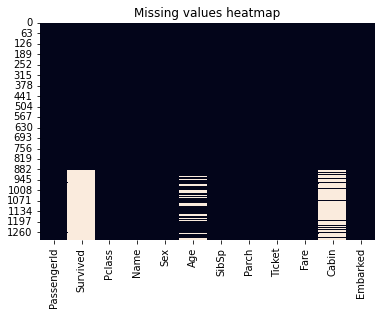

In [42]:
# Проверяем, какие ячейки пустые из объединенных тренировочных данных и тестовых

td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [43]:
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid', 'High_Mid','High'])

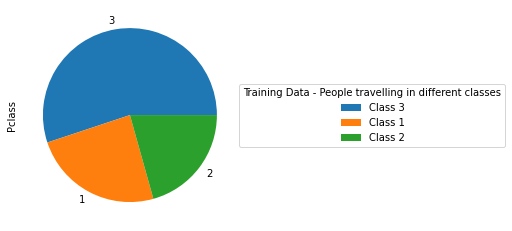

In [44]:
fig_pclass = trd.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Training Data - People travelling in different classes")

In [45]:
print(trd.Pclass.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

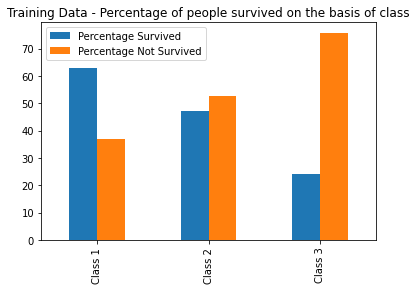

In [46]:
pclass_1_survivor_distribution = round((trd[trd.Pclass == 1].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((trd[trd.Pclass == 2].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((trd[trd.Pclass == 3].Survived == 1).value_counts()[1]/len(trd[trd.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")



'With AGE'

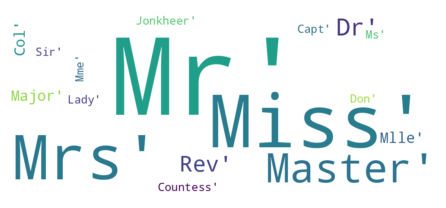

In [47]:
display('With AGE')
trd['Salutation'] = trd.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
trd.Salutation.nunique()
wc = WordCloud(width = 1000,height = 450,background_color = 'white').generate(str(trd.Salutation.values))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

'NO AGE'

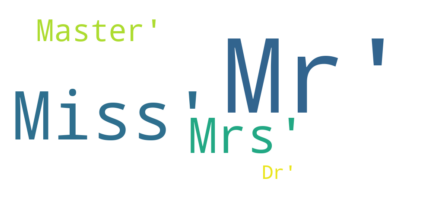

In [48]:
trd_no_age = trd.loc[trd.Age == ""]
trd_with_age = trd.loc[trd.Age != ""]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display (trd_no_age).Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display (trd_with_age).Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

display("NO AGE")
wc = WordCloud(width = 1000,height = 450,background_color = 'white').generate(str(trd_no_age.Salutation.values))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [49]:
# Преобразуем пол в 0 и 1

trd['Sex'] = LabelEncoder().fit_transform(trd['Sex'])

In [50]:
# Создаем новую таблицу из одной колонки Embarked, содержащей три значения: S, Q, C. 
# Новая таблица будет из трех колонок: Embarked_S, Embarked_Q, Embarked_C, в которых будут только 0 и 1

emb = pd.get_dummies(trd.Embarked, prefix="Embarked", drop_first = False)

# Добавляем новые колонки из новой таблицы в старую таблицу по одному

trd['Embarked_C'] = emb.Embarked_C
trd['Embarked_Q'] = emb.Embarked_Q
trd['Embarked_S'] = emb.Embarked_S

In [51]:
# Тоже самое делаем для классов

pclass = pd.get_dummies(trd.Pclass, prefix="Class", drop_first = False)

trd['Class_1'] = pclass.Class_1
trd['Class_2'] = pclass.Class_2
trd['Class_3'] = pclass.Class_3

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
display (trd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,,S,Mr,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,,S,Miss,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,Mrs,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,,S,Mr,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,,S,Rev,0,0,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,S,Miss,0,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,,1,2,W./C. 6607,23.4500,,S,Miss,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,C,Mr,1,0,0,1,0,0


In [52]:
master = trd_with_age[trd_with_age['Salutation'] == "Master"]  
#diplay(master)
display(master.Age.median())

3.5

In [53]:
miss = trd_with_age[trd_with_age['Salutation'] == "Miss"]  
#display(miss)
display(miss.Age.median())

21.0

In [54]:
mr = trd_with_age[trd_with_age['Salutation'] == "Mr"]  
#display(mr)
display(mr.Age.median())

30.0

In [55]:
mrs = trd_with_age[trd_with_age['Salutation'] == "Mrs"]  
#display(mrs)
display(mrs.Age.median())

doctor = trd_with_age[trd_with_age['Salutation'] == "Dr"]  
display(doctor)
display(doctor.Age.median())

35.0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
245,246,0,1,"Minahan, Dr. William Edward",male,44,2,0,19928,90.0000,C78,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54,0,0,29011,14.0000,,S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23,0,0,244278,10.5000,,S,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32,0,0,13214,30.5000,B50,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50,2,0,PC 17611,133.6500,,S,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49,0,0,17465,25.9292,D17,S,Dr


46.5

In [56]:
print (trd)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris    1  22      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38      1      0   
2                               Heikkinen, Miss. Laina    0  26      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35      1      0   
4                             Allen, Mr. William Henry    1  35      0      0   
..                                                 ...  .

In [57]:

#dataForNeural = [
#    int( trd['Pclass'] == 1 ),
#    int( trd['Pclass'] == 2),
#    trd['Pclass'] == 3 , 
#    trd['Sex']  == 'female',
#    trd['Sex']  == 'male',
#    trd['age'],
#    trd['SivSp'],
#    trd['Parch'],
#    trd['Embarked'] == S,
#    trd['Embarked'] == C,
#    trd['Embarked'] == Q
#]

In [58]:
dataForNeural = []
for string in trd[] :
    print (string[2])

SyntaxError: invalid syntax (<ipython-input-58-387d85e60cf5>, line 2)

In [ ]:
print(dataForNeural)

In [ ]:
#results = model.fit( trd, epochs = 3,  batch_size = 500, validation_data = tsd)